# 1 Getting started

Please make sure you have the proper environment and all necessary packages installed. Please refer to the README file for setting this up. 
Also, **remember to choose the conda env:ricse_bw25 as kernel**.

Please note that this notebook is designed to quickly help you complete LCA with BW25. However there is much to learn about data types 

This notebook has excerpts form the Brightway Book [here](https://learn.brightway.dev/en/latest/content/chapters/BW25/BW25_introduction.html#introductory-note) 

For shortcuts, check the BW cheatsheet [here](https://docs.brightway.dev/en/latest/content/cheatsheet/index.html)


# 2 Understanding BW25 structure
After you have BW25 up and running, you need to understand the BW2 data structure. Please read about it in the BW25 site [here](https://docs.brightway.dev/en/latest/content/overview/structure.html).

# 3 Importing needed packages
As you may know, before you are able to import the packages we will later use. For the moment:

In [5]:
import bw2analyzer as ba
import bw2calc as bc
import bw2data as bd
import bw2io as bi

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 3 Set up a project with baseline databases
We need to set a project with the Biosphere3 and LCIA methods databases in it. 

In here you have only the very basics.
More commands for projects: https://docs.brightway.dev/en/latest/content/cheatsheet/projects.html

You can see what projects you have already doing:


In [2]:
sorted(bd.projects) 

[Project: default,
 Project: LIVENreg_ei_391_con,
 Project: PNIEC_Mix,
 Project: SAPP_exercises,
 Project: SENTINEL_ei_391_con,
 Project: SENTINELspores,
 Project: TFM_Lex]

You can see the path to the place where the projects are saved doing:

In [3]:
bd.projects.dir

WindowsPath('C:/Users/user/AppData/Local/pylca/Brightway3/default.c21f969b5f03d33d43e04f8f136e7682')

Check the project that is currently active:

In [6]:
bd.projects.current

'RICSE_prj'

If you did not active any project, the cell above will return the default project.

There is a way of creating a project already with the Biosphere3 and the methods library in it. We will create the RICSE_2_prj project and will choose the tag of the Db we will later import: Ecoinvent 3.9.1.

In [4]:
bi.remote.install_project('ecoinvent-3.9.1-biosphere', 'RICSE_prj')

14811136it [00:03, 4479322.19it/s]                                                                                     


Restoring project backup archive - this could take a few minutes...
09:16:33 [info     ] Applying automatic update: 4.0 database search directories FTS5
Restored project: RICSE_prj


'RICSE_prj'

There are  few alternatives to the project_tag, is one of:
* ecoinvent-3.10-biosphere
* ecoinvent-3.8-biosphere
* ecoinvent-3.9.1-biosphere
* forwast
* USEEIO-1.1

The ecoinvent biosphere projects also include LCIA impact categories.

Now we still need to set the **RICSE_prj** project as the active project:

In [7]:
bd.projects.set_current(name='RICSE_prj')

In [ ]:
#just in case you need it:
#bd.projects.delete_project("RICSE_3_prj",delete_dir=True)

You can now come back to the previous lines of code and check that your project has been added to your project list!!

# 4 Set databases
We have just created an empty project. If it is the first time working with it, it does not yet contain any inventory data. If you have worked with it, it will have DBs.

More information about databases here: https://docs.brightway.dev/en/latest/content/cheatsheet/databases.html

We can check the DBs of our project now:

In [9]:
bd.databases

Databases dictionary with 4 object(s):
	biosphere3
	ei_391_LCI_cutoff
	ei_391_cutoff
	myfg_db

In case you would like to check the methods in your DB, you can do:

In [ ]:
sorted(bd.methods)

## 4.1 Importing Ecoivent

Now we import the Ecoinvent data. We will start with the UP data and then upload the LCI data
Remember to unzip the file. Then, provide the path to the unzipped folder **datasets** in the code below. 

You can find more information about data importing here:
https://docs.brightway.dev/en/latest/content/cheatsheet/importing.html#


### 4.1.1 Importing background information: Inventory data
**CAUTION**: This importing will not take as long as it did in AB but it **will still take you a LONG TIME, in Cristina's computer it was about three quarters of an hour**.

In [43]:
#filedir=r'C:\Users\user\UAB\LIVENlab - ENBIOSdev - ENBIOSdev\Ecoinvent_RAW\ecoinvent391_cutoff_LCI_DONOTEDIT\datasets'
filedir= r'C:\Users\1150226\UAB\LIVENlab - ENBIOSdev - ENBIOSdev\Ecoinvent_RAW\ecoinvent391_cutoff_LCI_DONOTEDIT\datasets'

importer = bi.SingleOutputEcospold2Importer(
    dirpath=filedir,
    db_name='ei_391_LCI_cutoff'
)
importer.apply_strategies()
importer.write_database()

Extracting XML data from 21238 datasets
Extracted 21238 datasets in 2665.94 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_unreasonably_high_lognormal_uncertainties
Applying strategy

100%|██████████████████████████████████████████████████████████████████████████| 21238/21238 [1:27:32<00:00,  4.04it/s]


13:26:38 [info     ] Vacuuming database            
Created database: ei_391_LCI_cutoff


Brightway2 SQLiteBackend: ei_391_LCI_cutoff

### 4.1.2 Importing foreground information: the UP database
We are importing first the Unit Process DB. Even thought we can create foreground processes ourselves, it will come in hando to have the option of using and modifying a process from the UP database.
**This process takes about 2 minutes in Cristina's computer**

In [10]:
#filedir=r'C:\Users\user\UAB\LIVENlab - ENBIOSdev - ENBIOSdev\Ecoinvent_RAW\ecoinvent391_cutoff_DONOTEDIT\datasets'
filedir= r'C:\Users\1150226\UAB\LIVENlab - ENBIOSdev - ENBIOSdev\Ecoinvent_RAW\ecoinvent391_cutoff_DONOTEDIT\datasets'
importer = bi.SingleOutputEcospold2Importer(
    dirpath=filedir,
    db_name='ei_391_cutoff'
)
importer.apply_strategies()
importer.write_database()

Extracting XML data from 21238 datasets
Extracted 21238 datasets in 41.29 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_unreasonably_high_lognormal_uncertainties
Applying strategy: 

100%|███████████████████████████████████████████████████████████████████████████| 21238/21238 [00:45<00:00, 468.42it/s]


09:21:12 [info     ] Vacuuming database            
Created database: ei_391_cutoff


Brightway2 SQLiteBackend: ei_391_cutoff

In [ ]:
#to delete a DB
#del bd.databases['<database_name>']

We can also draw the interactions of the Ecoinvent. This is how the technosphere links of a database look like:

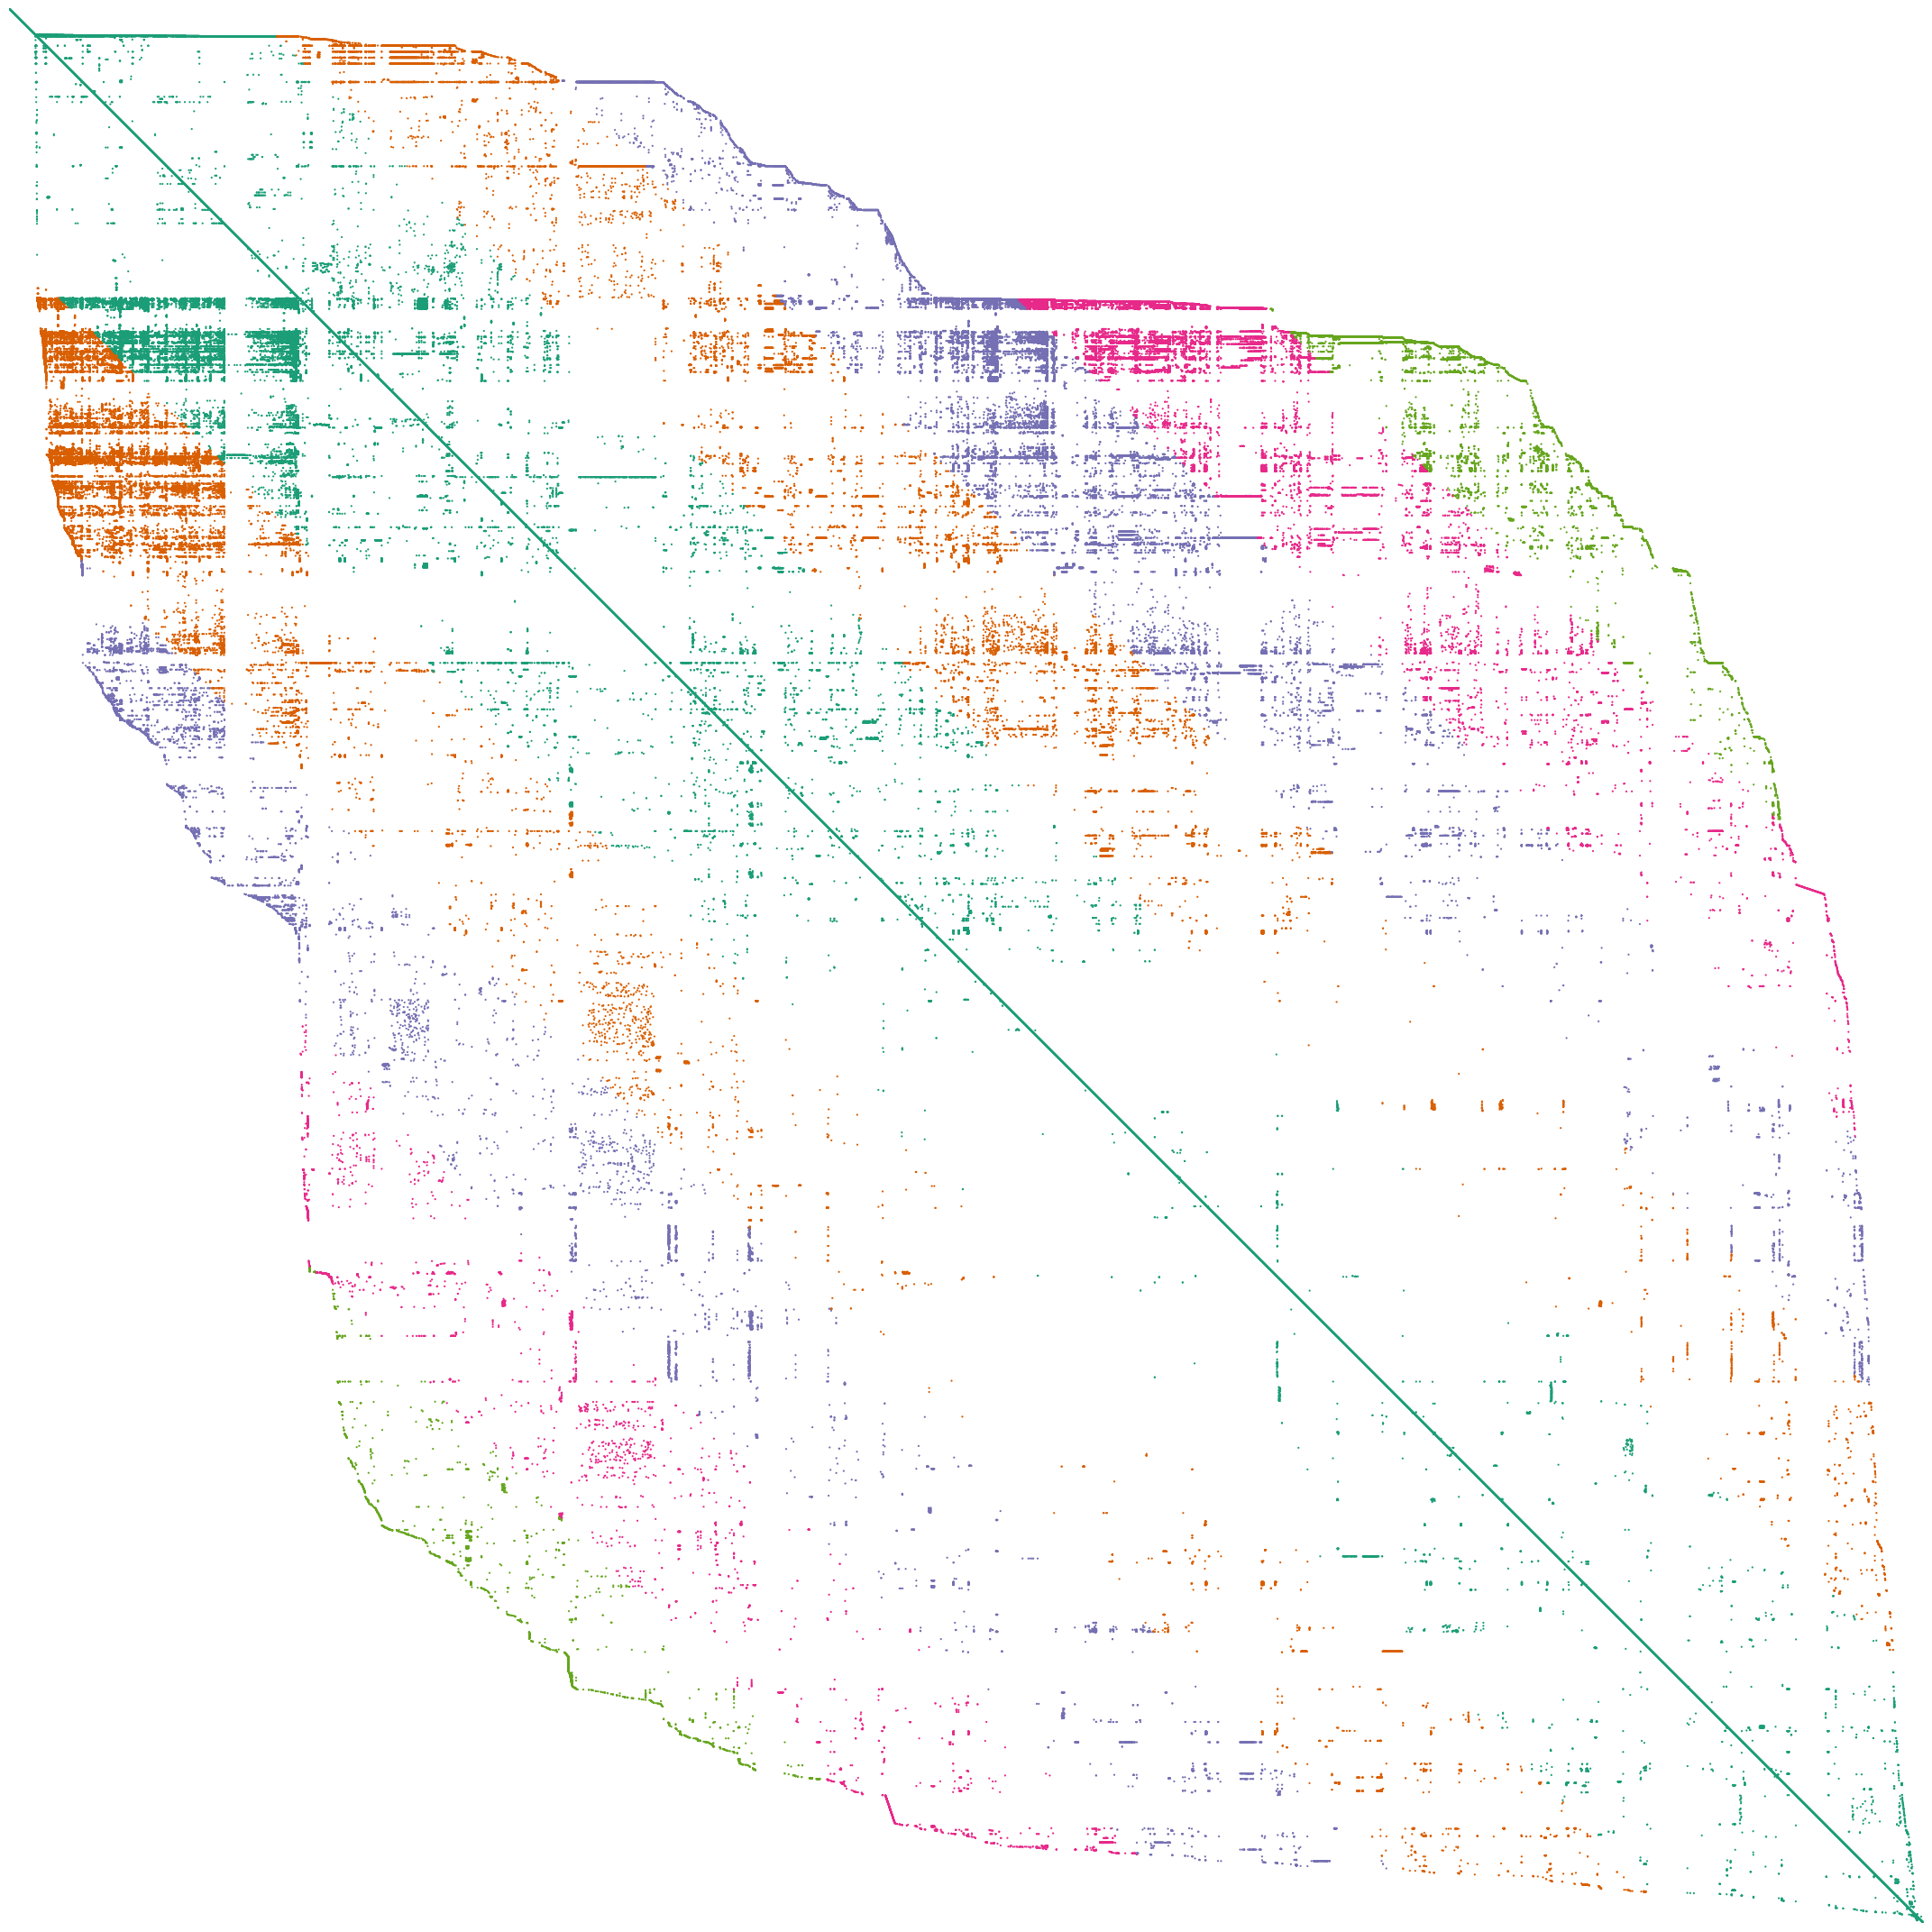

In [43]:
ei = bd.Database('ei_391_cutoff')
ei.graph_technosphere()


## 4.2 To check the lenght of a database
In you are unsure about the proper importing of the ecoinvent DBs, check here.

In [20]:
db = bd.Database('ei_391_cutoff')

We can now check the length of the database


In [21]:
length = len(db)
print(f"The database contains {length} datasets.")

The database contains 1 datasets.


# 5 Producing your own LCA graph

You can produce nodes and assign their related exchanges manually. For a cheatsheet: 
https://docs.brightway.dev/en/latest/content/cheatsheet/inventory.html

I'm creating and registering a new empty DB. You can check that it is included in the list of BDs to be sure.

In [17]:
myfg_db = bd.Database('myfg_db')
myfg_db.register()

You can go back and check that the DB is not in the list of databases.

Now we can create a node inside. A node is an activity. We will first assign characteristics to the node and then create exchanges that connect with ecoinvent data:

In [19]:
my_enermix = bd.Database('myfg_db').new_node(
    code='energy_mix_SP_ricse', 
    name="Energy Mix Spain RICSE", 
    categories=('energy',),
    type='process',
    unit='kg',
    location= 'ES')
my_enermix.save() 

Note that we always need to save the node after defining it. That is, we are writting it in the database.

See how now myfg_db has 1 record. This means that each record is a node in a Brightway 2.5 database. Now we can add exchanges to that node, including connections with ecoinvent. The basic form to create an echange (or edge) is:

In [19]:
<a node>.new_edge(
    amount=2.5, 
    type='technosphere',
    input= <Some other node>,
    uncertainty_type=5, 
    minimum=200, 
    maximum=300
).save()

There are indeed a number of attributes that you can add to both, nodes and exchanges. 

## 5.1 Linking activities from Ecoinvent
The troouble when you are connecting processes from Ecoinvent is that you need to find a way to refer to them inequivocally. We will have to look for a certain attribute that help us subset that particular node and connect it with our DB. 

There is more information about node apptrbutes here: https://docs.brightway.dev/en/latest/content/cheatsheet/inventory.html#nodes-activities

Let's think that I am going to include PV, wind and batteries to my energy mix activity node above. I'll start by exploring ecoinvent. This search is not very specific so "wind" will return all activities that contin wind in any attribute.

In [111]:
activities =bd.Database('ei_391_cutoff').search('electricity production, wind', limit=100, facet= 'name')
sorted(activities)

['electricity production, compressed air energy storage',
 'electricity production, compressed air energy storage, adiabatic',
 'electricity production, wind, 1-3mw turbine, offshore',
 'electricity production, wind, 1-3mw turbine, onshore',
 'electricity production, wind, 1-3mw turbine, onshore, renewable energy products',
 'electricity production, wind, 2.3mw turbine, precast concrete tower, onshore',
 'electricity production, wind, <1mw turbine, onshore',
 'electricity production, wind, <1mw turbine, onshore, renewable energy products',
 'electricity production, wind, >3mw turbine, onshore',
 'electricity production, wind, >3mw turbine, onshore, renewable energy products',
 'electricity, high voltage, wind power, import from germany',
 'market for wind power plant, 800kw, fixed parts',
 'market for wind power plant, 800kw, moving parts',
 'market for wind turbine, 2.3mw, onshore',
 'market for wind turbine, 2mw, onshore',
 'market for wind turbine, 4.5mw, onshore',
 'market for wind

See that databases in BW25 are storaged as nested dictionaries, we might want to find out the code of an activity to select it as the code is a unique value.

I am now going to save an activity to connect it with my energy mix. The activity is going to be electricity from wind from Spain. I will get it as instance and then will check all attributes:

In [121]:
windSP = bd.get_node({"electricity production, wind, 1-3MW turbine, onshore": True}, location="LT")
windSP

NameError: name 'db' is not defined

Now that we saw that we have chosen our activity well, we can check its attributes:

In [ ]:
windSP.as_dict()

And now we understand our activity better and can create an edge between my energy mix and this wind-related node. I will set the amount as 0.4 to represent that 40% of the energy mix comes from wind. We need to be sure  save the edge.

In [ ]:
my_enermix.new_edge(
    amount=0.4, 
    type='technosphere',
    input= windSP,
).save()

We will have to identify new activities for the rest of the energy mix-related activities. In this case I will include batteries (20%) and PV (30%). I will first look for those activities and then make them instances of nodes and add them to the mix. Use the searching cells above to locate your new nodes:

In [39]:
pvSP=bd.get_node(name="electricity production, photovoltaic, 570kWp open ground installation, multi-Si", location="ES")
pvSP

batSP=bd.get_node(name="battery production, Li-ion, LFP, rechargeable, prismatic", location="CN")
batSP

MultipleResults: Found 2 results for the given search

In [ ]:
my_enermix.new_edge(
    amount=0.4, 
    type='technosphere',
    input= pvSP,
).save()

battkg_kwh=2
my_enermix.new_edge(
    amount=0.2*battkg_kwh # I use parameters because batteries are given in kilos, 
    type='technosphere',
    input= batSP,
).save()

In [ ]:
we can add it to our self-made activity in the myfg_db "energy mix"

## 5.2 Importing your foreground information: Excel import

Use the sample excel file that you can find in this repository to test the import. You will see that the excel file is very intuitive, but that you need the exact names of the activities you want to link. You can still use Activity Browser to check for those if it is easier than searching in BW directly. 

Also, remember to copy the example and name your excel file with the name of the new DB you want to import. Each sheet is one new LCI database including the reference activity and the included upstream activities. 

You can find a number of excel templates here:
https://github.com/brightway-lca/brightway2-io/tree/main/tests/fixtures/excel

**This is the file you will need to adapt for your projects**

In [32]:
fg_db = bi.ExcelImporter(r'C:\Users\user\Documents\PyProjects\TeachingMaterials\lci-turbine_examples.xlsx')
fg_db.apply_strategies()
fg_db.match_database("ei_391_cutoff", fields=('name', 'unit', 'location'))
fg_db.write_database()

Extracted 1 worksheets in 0.01 seconds


## 5.3Interacting with the graph

In [ ]:
moo = bd.get_node(name='Cattle ranches and feedlots', type='product')

In [ ]:
type(moo) == bd.Node

We can assign any attributes to nodes (and to edges)

In [ ]:
moo['moo'] = 'loud'

Note that this attributes are not saved to the database by default - we have to tell Brightway to save changed data!

We have some attributes which are common to all inventory databases

In [ ]:
moo['categories'], moo['location'], moo['unit']

The node classes act like dictionaries, and raise error for missing keys

In [ ]:
moo['missing']

# 6 Impact Assessment

For today we will just do a simple and a multi LCA. Let's remember the methods we have in our DB:

In [32]:
sorted(bd.methods)

[('CML v4.8 2016',
  'acidification',
  'acidification (incl. fate, average Europe total, A&B)'),
 ('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)'),
 ('CML v4.8 2016',
  'ecotoxicity: freshwater',
  'freshwater aquatic ecotoxicity (FAETP inf)'),
 ('CML v4.8 2016',
  'ecotoxicity: marine',
  'marine aquatic ecotoxicity (MAETP inf)'),
 ('CML v4.8 2016',
  'ecotoxicity: terrestrial',
  'terrestrial ecotoxicity (TETP inf)'),
 ('CML v4.8 2016',
  'energy resources: non-renewable',
  'abiotic depletion potential (ADP): fossil fuels'),
 ('CML v4.8 2016', 'eutrophication', 'eutrophication (fate not incl.)'),
 ('CML v4.8 2016', 'human toxicity', 'human toxicity (HTP inf)'),
 ('CML v4.8 2016',
  'material resources: metals/minerals',
  'abiotic depletion potential (ADP): elements (ultimate reserves)'),
 ('CML v4.8 2016',
  'ozone depletion',
  'ozone layer depletion (ODP steady state)'),
 ('CML v4.8 2016',
  'photochemical oxidant formation',
  'photochemical oxidation (h

Note that we have one entry per each one of the indicators of a method. We have to tell BW which indicator do we want to calculate and for what activity.

In [14]:
ecotox = bd.Method(('CML v4.8 2016',
  'ecotoxicity: terrestrial',
  'terrestrial ecotoxicity (TETP inf)'))


This is already enough to do an LCA. Let's check what our answer should be. Without uncertainty, to make one bike we need 2.5 kg of CF, and carbon fibre produces 26.6 kg CO2 per kg of carbon fibre, so we are looking for around 60 kg CO2-eq.

In [16]:
lca = bc.LCA(demand={bike: 1}, method=('IPCC',))
lca.lci()
lca.lcia()
lca.score

66.50000095367433

To use uncertainty, we tell the `LCA` object to use the probability distributions:

In [ ]:
lca = bc.LCA(demand={bike: 1}, method=('IPCC',), use_distributions=True)
lca.lci()
lca.lcia()

df = pd.DataFrame([{'score': lca.score} for _ in zip(lca, range(10))])
df

## Exercise

Create a new LCIA method for your iron ore consumption. Calculate the LCIA result you should get, and then verify that you have the correct value.

In [20]:
list(bike.technosphere())

[Exchange: 2.5 kg 'carbon fibre production' (kg, DE, None) to 'bike production' (bike, DK, None)>,
 Exchange: 2.5 kg 'Ore' (kg, GLO, ('earth',)) to 'bike production' (bike, DK, None)>,
 Exchange: 2.5 kg 'Ore' (kg, GLO, ('earth',)) to 'bike production' (bike, DK, None)>]

In [ ]:
co2.save()CrisMethod=bd.Method(('CrisMethod',))
CrisMethod.write([
    (ore.key, {'amount': 1, 'uncertainty:type':3, 'loc':1, 'scale':0.05}),
])

lca= bc.LCA(demand ={bike:1}

# 6 Searching through the database

In addition to storing and using nodes and edges, our graph database can be searched in different ways. Let's show this with a larger database.

We can use a shortcut to install some data:

In [ ]:
db = bd.Database("ei_391_LCI_cutoff")
db.name

This database has processes **and** products. What would this mean for drawing a graph?

We can search with the 'search' function.

In [ ]:
fun = db.search("storage")[0]
fun['name'] = 'storage'
fun.save()

In [ ]:
{node['name'] for node in db if node['type'] == 'product'}